<a href="https://colab.research.google.com/github/DSNortsev/CSE590-PythonAndDataAnalytics/blob/main/HW3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install --user -U nltk
!python -m textblob.download_corpora

Requirement already up-to-date: nltk in /root/.local/lib/python3.7/site-packages (3.5)
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [187]:
# Import Libraries
from textblob import TextBlob, Word
from pathlib import Path
from operator import itemgetter
import matplotlib.pyplot as plt
import imageio
from wordcloud import WordCloud
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Part 1:**

## Select and download three texts of your choosing that satisfy the following criteria:th i. All texts should have the same media format (ex: 3 novels, 3 movie scripts, 3 news articles, etc.) ii. One of the three texts should have a conceptual discrepancy from the others. In a nutshell, a conceptual discrepancy between works is a key feature or characteristic that distinguishes otherwise similar entities. I am highly flexible as to what defines a discrepancy from one document to the next, but feel free to reach out if you are unsure. Some examples are below:

## a. Two non-fiction novels and one fiction novel

## **b. Two romantic comedy scripts and one horror script**

## c. Two sports news articles and one current events article
Make sure you briefly descibe your documents and cite the conceptual discrepancy that you have chosen in a paragraph

In [139]:
# Import horror script
blob_horror = TextBlob(Path('7_days_to_live.txt').read_text())
# Import comedy script
blob_comedy1 = TextBlob(Path('pygmalion.txt').read_text())
# Import comedy script
blob_comedy2 = TextBlob(Path('sleepless_in_seattle.txt').read_text())

In [140]:
print(f'Total number of words in the sctips:',
      f'Horror:  {len(blob_horror.words)}',
      f'Comedy1: {len(blob_comedy1.words)}',
      f'Comedy2: {len(blob_comedy2.words)}', sep='\n')

Total number of words in the sctips:
Horror:  19354
Comedy1: 25632
Comedy2: 20751


# **Part 2:**

## (a) Compute word counts for each of your documents after excluding English stop words (and optionally, performing lemmatization).


In [141]:
stops = stopwords.words('english')
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [145]:
def exclude_stop_words(txt_blob):
  regexp = re.compile('[^a-zA-Z-]+')
  usable_words = {}
  stops = stopwords.words('english')
  count = 0
  for item in txt_blob.word_counts.items():
    if regexp.search(item[0]):
      continue

    lemmatized_word = Word(item[0].lower()).lemmatize()
    if lemmatized_word not in stops:
      if lemmatized_word not in usable_words:
        usable_words[lemmatized_word] = item[1]
      else:
        # print(f'{lemmatized_word} = {usable_words[lemmatized_word]} + {item[1]}')
        usable_words[lemmatized_word] = usable_words[lemmatized_word] + item[1]    
  return usable_words

In [146]:
usable_words_horror = exclude_stop_words(blob_horror).items()
usable_words_comedy1 = exclude_stop_words(blob_comedy1).items()
usable_words_comedy2 = exclude_stop_words(blob_comedy2).items()

In [157]:
print(f'Total number of words after removing special characters,stopwords and lemmatization :',
      f'Horror:  {sum([item[1] for item in usable_words_horror])}',
      f'Comedy1: {sum([item[1] for item in usable_words_comedy1])}',
      f'Comedy2: {sum([item[1] for item in usable_words_comedy2])}', sep='\n')

Total number of words after removing special characters,stopwords and lemmatization :
Horror:  10196
Comedy1: 12838
Comedy2: 10812


## (b) Create and display a bar plot for each document that include word counts for the 25 most frequent words (after the above processing).

In [161]:
sorted_horror_words =sorted(usable_words_horror, key=itemgetter(1), reverse=True)
sorted_comedy1_words =sorted(usable_words_comedy1, key=itemgetter(1), reverse=True)
sorted_comedy2_words =sorted(usable_words_comedy2, key=itemgetter(1), reverse=True)

In [180]:
def plot_bar(words, title, most_common_count=25):
  """ Plot most common words"""
  df = pd.DataFrame(words[:most_common_count], columns=['word', 'count'])
  df.plot.bar(x='word', y='count', legend=False, title=title)
  plt.gcf().tight_layout()

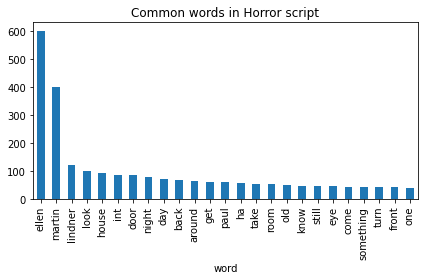

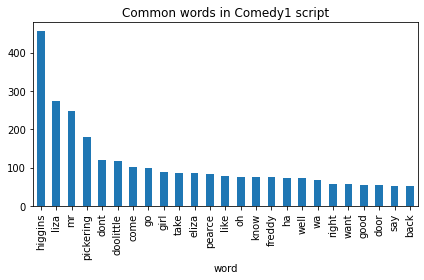

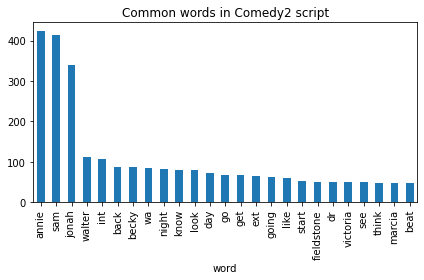

In [181]:
plot_bar(sorted_horror_words, 'Common words in Horror script')
plot_bar(sorted_comedy1_words, 'Common words in Comedy1 script')
plot_bar(sorted_comedy2_words, 'Common words in Comedy2 script')

## (c) Create and display a word cloud for each document (using a mask image of your choice) that includes only the 100 most frequent words. Note that you'll likely want to use the approach outlined in Session 25 that utilizes the fitwords method, since you will want data consistent with those for part (b).

In [219]:
def generate_wc(words,mask_image, file_name, max_count=100):
  # Import mask image for word cloud
  mask_image = imageio.imread(mask_image)
  wc = WordCloud(width=1000, height=1000,
                      colormap='prism', mask=mask_image, background_color='white')
  wc = wordcloud.fit_words({item[0]:item[1] for item in words[:max_count]})
  wc.to_file(file_name)
  plt.figure(figsize=(10,10))
  plt.axis("off")
  plt.imshow(wc, cmap=plt.cm.gray)

Common words in Horror script


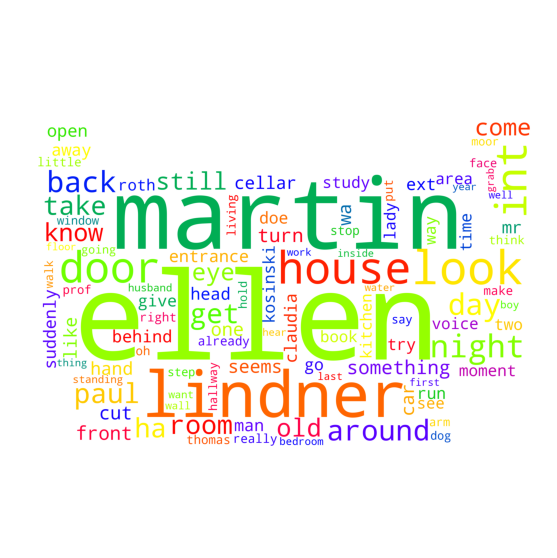

In [227]:
print('Common words in Horror script')
generate_wc(sorted_horror_words, 'mask_background.png', 'horrow_wc.png')

Common words in Comedy1 script


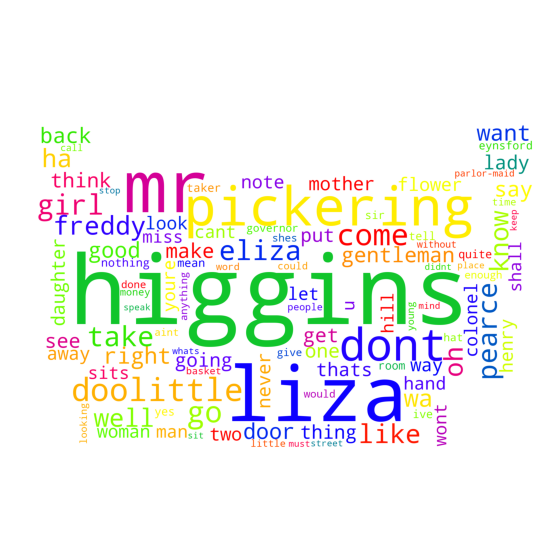

In [228]:
print('Common words in Comedy1 script')
generate_wc(sorted_comedy1_words, 'mask_background.png', 'comedy1_wc.png')

Common words in Comedy2 script


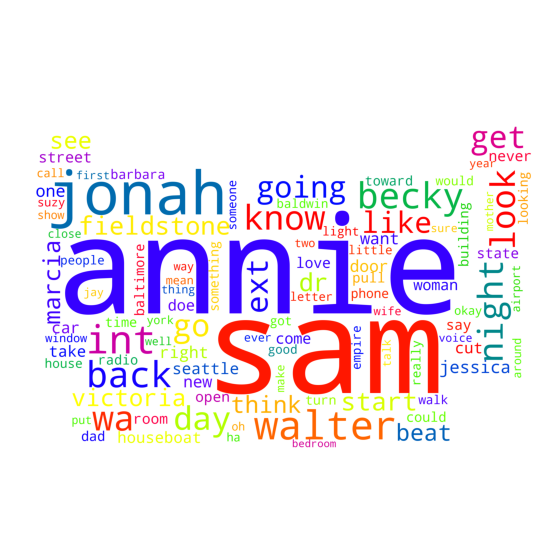

In [229]:
print('Common words in Comedy2 script')
generate_wc(sorted_comedy2_words, 'mask_background.png', 'comedy2_wc.png')

## (d) Do you notice any difference between the document with a conceptual discrepancy relative to the others wrt (b) and/or (c) above? Try to explain why or why not.

# **Part 3:**

## (a) Use Textatistic to compute the average of the Flesch–Kincaid, Gunning Fog, SMOG, and Dale–Chall scores for each document.


## (b) Are there noticeable differences among your documents's readability scores, and do you suspect any difference is present (or should be present) based on your chosen conceptual discrepancy?

# **Part 4:**

## (a) Use spaCy to compute the pairwise similarity between your documents (i.e. doc. 1 to doc. 2, doc. 1 to doc. 3, doc. 2 to doc. 3).


## (b) Based on these similarity measures, is your document with the conceptual disparity comparatively similar to or different from the others? Is this an expected result or not?

# **Part 5:**

## (a) Use spaCy to find the named entities in your documents.


## (b) Produce a bar plot for each document that includes the count for the 20 most common named entities (by name).


## (c) Produce a second bar plot per document based on the counts of every named entity type (PERSON, ORG, etc.)

## (d) Do you notice any meaningful differences (or similarities) among the documents wrt to these plots? If so, explain what they are.